**Table of contents**<a id='toc0_'></a>    
- 1. [Rabi](#toc1_)    
- 2. [Ramsey](#toc2_)    
- 3. [Hahn](#toc3_)    
- 4. [PODMR](#toc4_)    
- 5. [CPMG](#toc5_)    
- 6. [XY](#toc6_)    
- 7. [XY8](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
from qutip import tensor, jmat, qeye, fock_dm
import numpy as np
import matplotlib.pyplot as plt

from quaccatoo.BasicPulsedExperiments import Rabi, Hahn, PODMR, Ramsey
from quaccatoo.DDPulsedExperiments import  XY, XY8, CPMG
import quaccatoo.PulsedLogic as PulsedLogic
from quaccatoo.PredefinedHamiltonians import NV_H0, NV_H1, NV_rho0, NV_observable, NV_MW_freqs
from quaccatoo.Analysis import fit_rabi

# 1. <a id='toc1_'></a>[Rabi](#toc0_)

In [2]:
experiment = Rabi(
    pulse_duration = np.linspace(0, .05, 1000),
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=400, N=15, units_B0='G', theta=1, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=400, N=15, theta=1, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)

experiment.run(
    # observable = NV_observable(15),
    observable = [tensor(fock_dm(3, 1), qeye(2)), tensor(fock_dm(3, 2), qeye(2))],
    options = {'nsteps': 1e6}
)

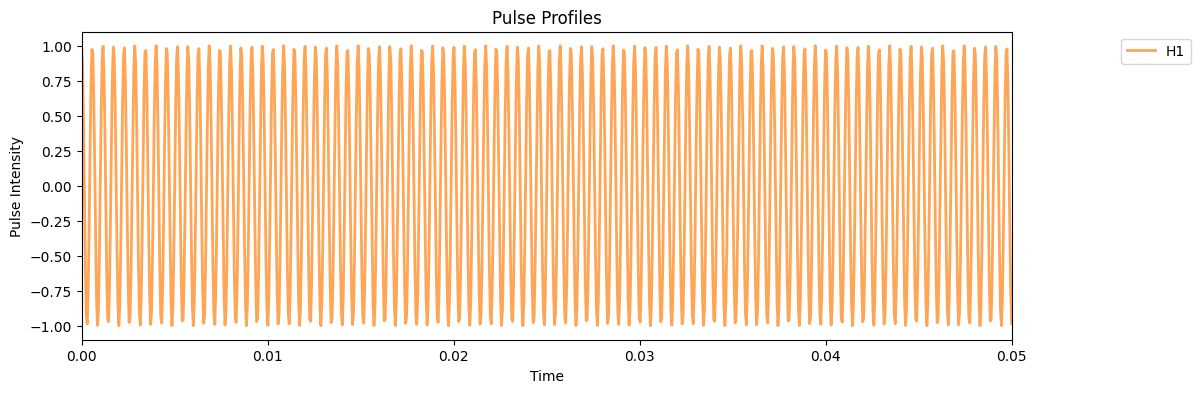

In [3]:
experiment.plot_pulses(figsize=(12, 4))

Fit parameters 0: [ 4.98523991e-01  1.59007793e-02  5.00964891e-01 -3.56110428e-05]
Covariance matrix 0: [[3.91514309e-08 7.13490700e-11 2.18664218e-09 2.46834675e-08]
 [7.13490700e-11 6.12169082e-12 1.56723453e-11 1.84212464e-09]
 [2.18664218e-09 1.56723453e-11 2.16216811e-08 2.20855191e-08]
 [2.46834675e-08 1.84212464e-09 2.20855191e-08 7.34734841e-07]]
Fit parameters 1: [0.49855497 0.01590078 0.49881265 3.14156684]
Covariance matrix 1: [[ 3.91635825e-08  7.12488873e-11 -2.18911369e-09  2.46431320e-08]
 [ 7.12488873e-11  6.12824949e-12 -1.59586354e-11  1.84462596e-09]
 [-2.18911369e-09 -1.59586354e-11  2.16367464e-08 -2.22060036e-08]
 [ 2.46431320e-08  1.84462596e-09 -2.22060036e-08  7.35757207e-07]]


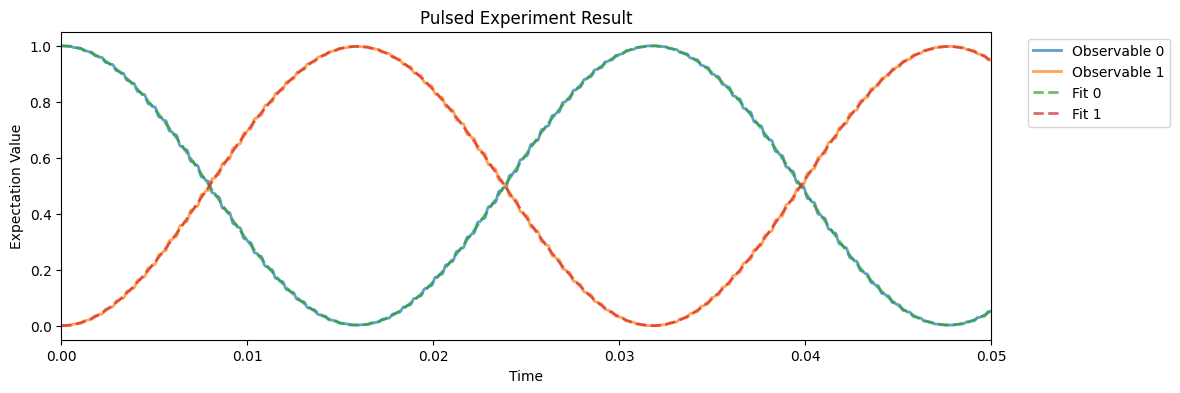

In [4]:
experiment.plot_results(figsize=(12, 4), fit_function=[fit_rabi, fit_rabi], fit_guess = [[1, .015, 0, 0], [1, .015, 0, np.pi/2]])

# 2. <a id='toc2_'></a>[Ramsey](#toc0_)

In [5]:
experiment = Ramsey(
    free_duration = np.linspace(0, 10, 1000),
    pi_pulse_duration = 1.59007789e-02,
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=400, N=15, units_B0='G', theta=1, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=400, N=15, theta=1, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)


experiment.run(
    observable = NV_observable(15),
)

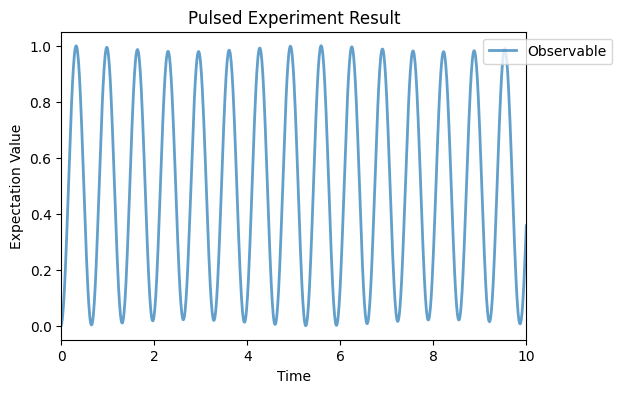

In [6]:
experiment.plot_results(figsize=(6, 4))

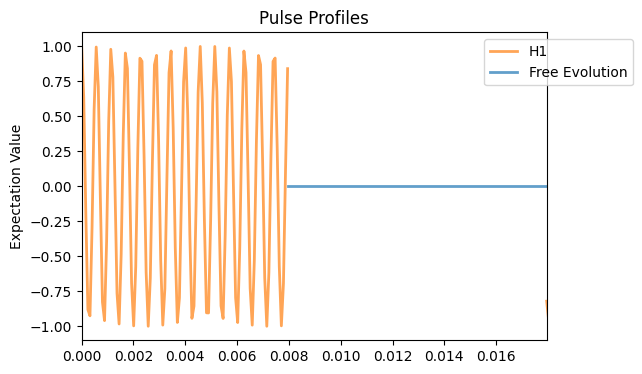

In [7]:
experiment.plot_pulses(tau=.01,figsize=(6, 4))

# 3. <a id='toc3_'></a>[Hahn](#toc0_)

In [4]:
experiment = Hahn(
    free_duration = np.linspace(0, 10, 1000),
    pi_pulse_duration = 1.59007789e-02,
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=400, N=15, units_B0='G', theta=1, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=400, N=15, theta=1, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)

# experiment = Hahn(
#     tarray = np.linspace(0, 100, 100),
#     rho0 = fock_dm(2, 0),
#     H0 = jmat(1/2, 'z'),
#     pi_pulse_duration = 220,
#     H1 = .02*jmat(1/2, 'x'),
#     pulse_shape = PulsedLogic.square_pulse,
#     pulse_params = {'w_pulse': 1},
#     time_steps = 1000 
# )

# experiment.run(
#     # observable = [fock_dm(2, 0), fock_dm(2, 1)]
#     observable = NV_observable(15),
# )

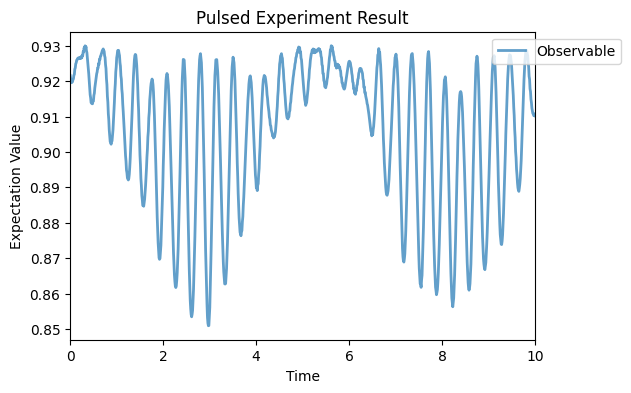

In [8]:
experiment.plot_results(figsize=(6, 4))

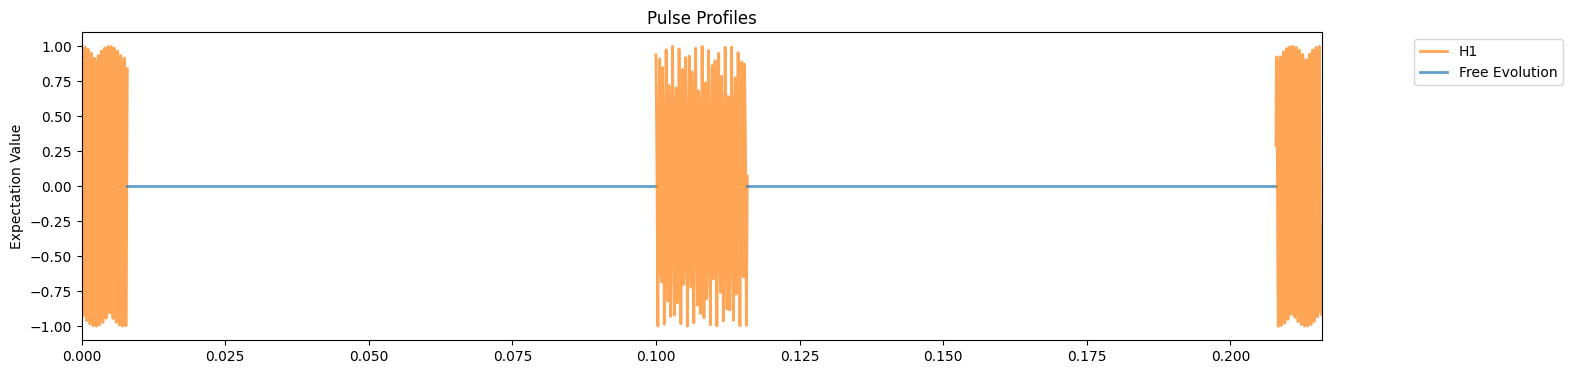

In [5]:
experiment.plot_pulses(tau=.1, figsize=(16, 4))

# 4. <a id='toc4_'></a>[PODMR](#toc0_)

In [11]:
experiment = Rabi(
    pulse_duration = np.linspace(0, 4, 1000),
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=40, N=15, units_B0='G', theta=4, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi/10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=40, N=15, theta=4, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)

experiment.run(
    # observable = NV_observable(15),
    observable = tensor(fock_dm(3, 1), qeye(2)),
    options = {'nsteps': 1e6}
)

In [12]:
def double_sine(t, A, B, T1, T2, C):
    return A*np.cos(np.pi*t/T1) + B*np.cos(np.pi*t/T2)  + C

Fit parameters: [2.13930954e-03 2.85815604e-03 4.05163523e-01 2.93789260e+00
 9.76327566e-01]
Covariance matrix: [[ 2.89252970e-07 -1.79420780e-09  8.91324684e-08 -5.46740358e-06
   4.51798390e-09]
 [-1.79420780e-09  2.98730919e-07  7.90911277e-08 -3.01424722e-05
   6.96346685e-08]
 [ 8.91324684e-08  7.90911277e-08  3.24604428e-05 -3.06993034e-04
   2.40529093e-07]
 [-5.46740358e-06 -3.01424722e-05 -3.06993034e-04  6.93064707e-02
  -2.19368268e-05]
 [ 4.51798390e-09  6.96346685e-08  2.40529093e-07 -2.19368268e-05
   1.63126624e-07]]


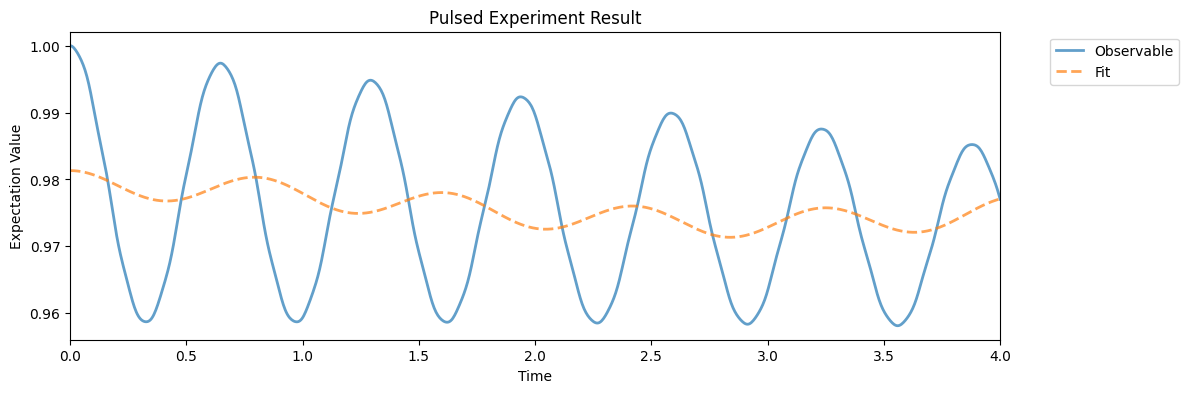

In [13]:
experiment.plot_results(figsize=(12, 4), fit_function=double_sine, fit_guess=[1, 0.005, 0.4, 4, 0.96])

In [16]:
experiment = PODMR(
    frequencies =  np.linspace(2600, 3100, 500),
    freqs_rad = False,
    pulse_duration = 0.45,
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=40, N=15, units_B0='G', theta=4, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*4, N=15),
)

experiment.run(
    observable = NV_observable(15),
)

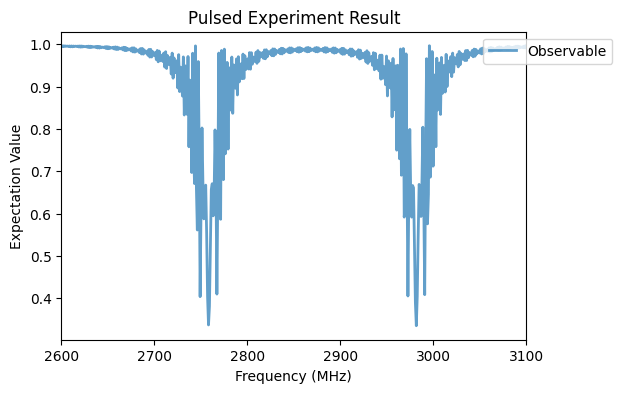

In [17]:
experiment.plot_results(figsize=(6, 4), xlabel='Frequency (MHz)')

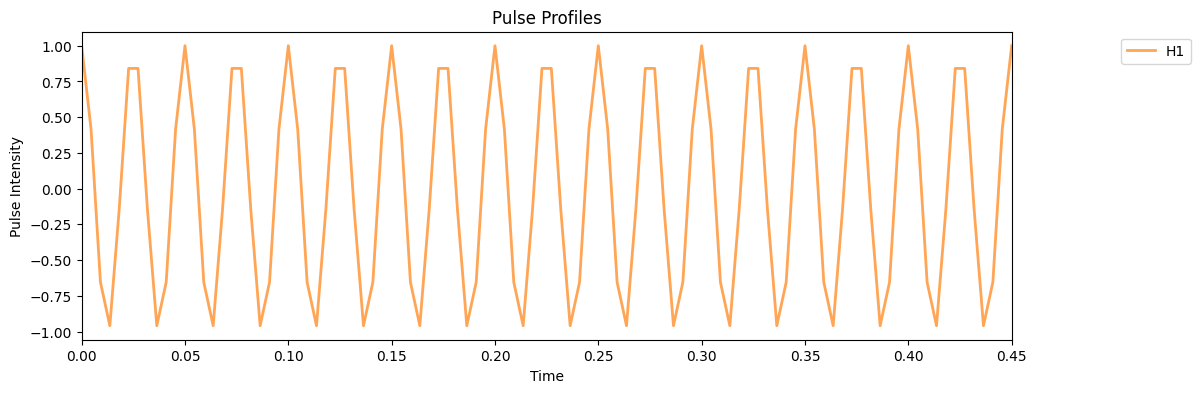

In [18]:
experiment.pulse_params['omega_pulse'] = 2*np.pi*2600
experiment.plot_pulses(figsize=(12, 4))

# 5. <a id='toc5_'></a>[CPMG](#toc0_)

In [5]:
experiment = CPMG(
    M = 4,
    free_duration = np.linspace(0.1, .6, 100),
    pi_pulse_duration = 1.59007789e-02,
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=400, N=15, units_B0='G', theta=1, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=400, N=15, theta=1, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)

# experiment.run(
#     observable = NV_observable(15)
# )

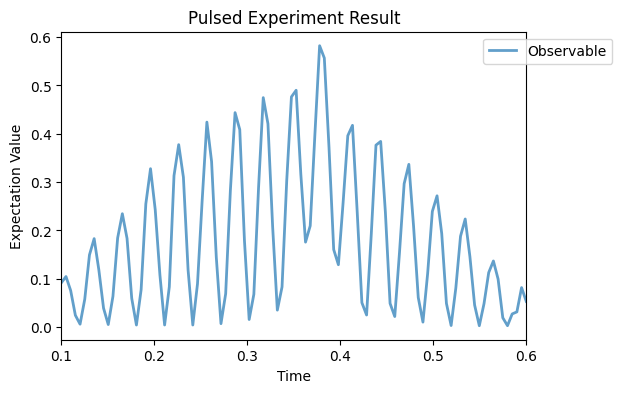

In [4]:
experiment.plot_results(figsize=(6, 4))

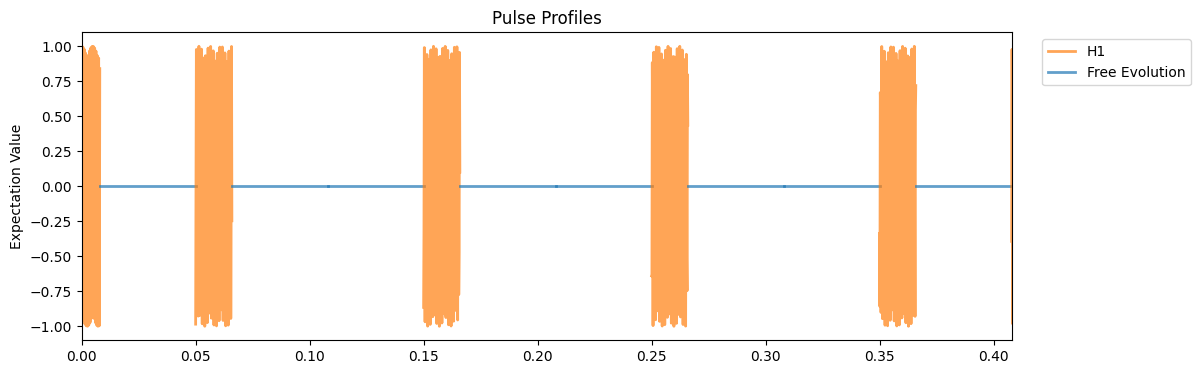

In [6]:
experiment.plot_pulses(tau = .1, figsize=(12, 4))

# 6. <a id='toc6_'></a>[XY](#toc0_)

In [2]:
experiment = XY(
    M = 4,
    free_duration = np.linspace(.2, .6, 100),
    pi_pulse_duration = 1.59007789e-2,
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=400, N=15, units_B0='G', theta=1, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=400, N=15, theta=1, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)

# experiment.run(
#     observable = NV_observable(15)
# )

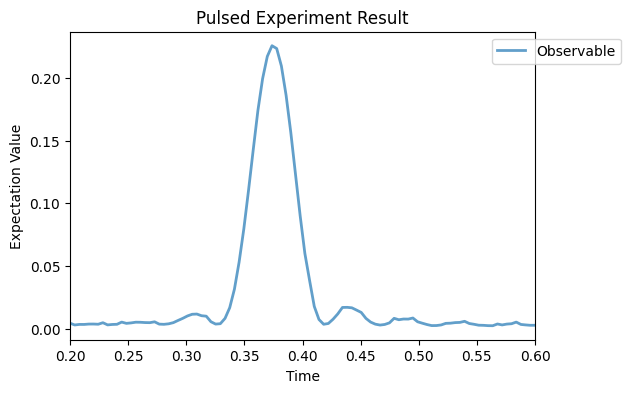

In [6]:
experiment.plot_results(figsize=(6, 4))

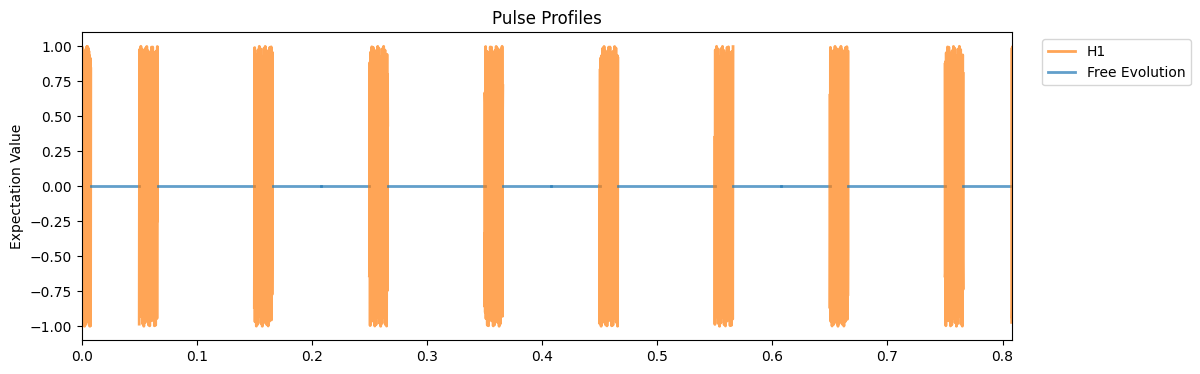

In [3]:
experiment.plot_pulses(tau = .1, figsize=(12, 4))

# 7. <a id='toc7_'></a>[XY8](#toc0_)

In [12]:
experiment = XY8(
    M = 2,
    free_duration = np.linspace(.2, .6, 100),
    pi_pulse_duration = 1.59007789e-02,
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=400, N=15, units_B0='G', theta=1, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=400, N=15, theta=1, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)

experiment.run(
    observable = NV_observable(15),
)

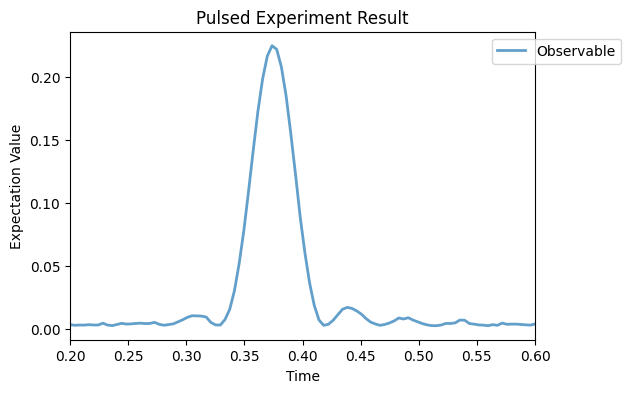

In [13]:
experiment.plot_results(figsize=(6, 4))